In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from sklearn.metrics import mean_squared_error
import warnings

In [2]:
df = pd.read_excel('2. Data Temperatur Maksimum.xlsx', index_col = "Tanggal", parse_dates = True)
df


,Temperatur Maksimum (°C)
Tanggal,
2005-01-01,27.8
2005-01-02,29.1
2005-01-03,28.6
2005-01-04,28.4
2005-01-05,27.8
...,...
2013-08-27,30.8
2013-08-28,30.0
2013-08-29,29.0


In [3]:
# Menghapus baris yang mengandung missing values (NaN)
df_cleaned = df.dropna()


In [4]:
# Mengecek apakah ada missing values dalam DataFrame
missing_values = df_cleaned.isnull().values.any()

if missing_values:
    print("Terdapat missing values dalam DataFrame.")
else:
    print("Tidak ada missing values dalam DataFrame.")

Tidak ada missing values dalam DataFrame.


In [5]:
df

,Temperatur Maksimum (°C)
Tanggal,
2005-01-01,27.8
2005-01-02,29.1
2005-01-03,28.6
2005-01-04,28.4
2005-01-05,27.8
...,...
2013-08-27,30.8
2013-08-28,30.0
2013-08-29,29.0


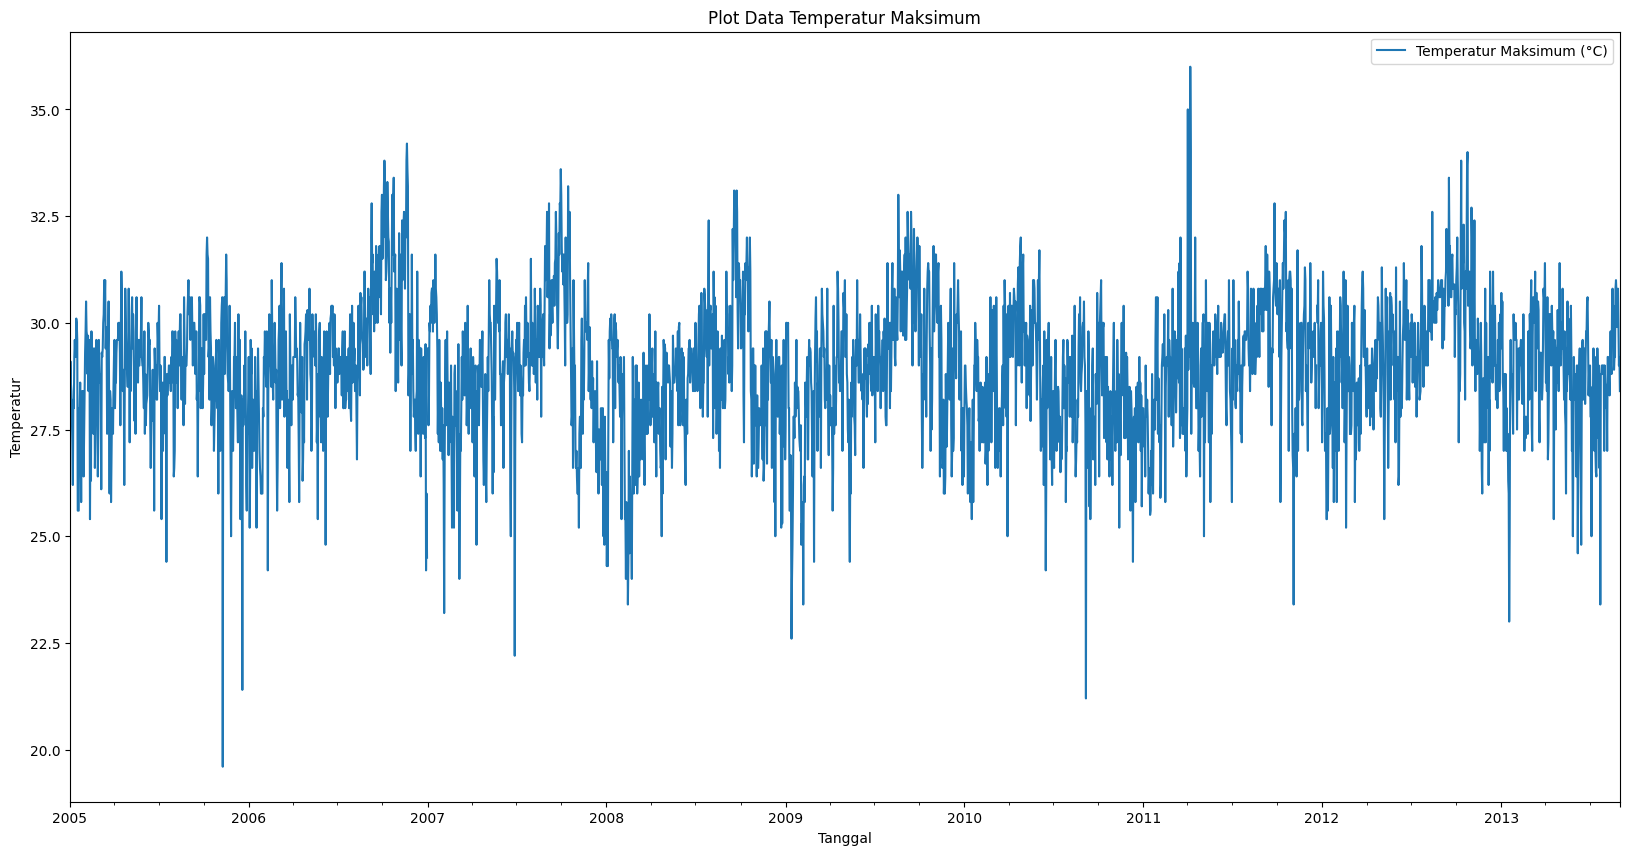

In [6]:
df.plot(figsize=(20,10))
plt.title('Plot Data Temperatur Maksimum');
plt.ylabel("Temperatur")
plt.xlabel("Tanggal")
plt.legend()
plt.show()

In [7]:
# Fungsi untuk uji ADF dan interpretasi hasil
def adf_test(data, column_name):
    result = adfuller(data)
    uji_statistik, p_value, _, _, nilai_kritis, _ = result

    print(f"Hasil uji ADF untuk kolom '{column_name}':")
    print(f"Nilai statistik uji: {uji_statistik}")
    print(f"Nilai p-value: {p_value}")
    print(f"Nilai Kritis:")
    for key, value in nilai_kritis.items():
        print(f"    {key}: {value}")

    if p_value < 0.05 and uji_statistik < nilai_kritis['5%']:
        print("Data cenderung stasioner")
    else:
        print("Data cenderung tidak stasioner. Data perlu diolah lebih lanjut.")

# Ganti 'nama_kolom' dengan nama kolom yang ingin diuji
nama_kolom = 'Temperatur Maksimum (°C)'
kolom_data = df_cleaned[nama_kolom]

# Uji ADF pada kolom_data
adf_test(kolom_data, nama_kolom)

Hasil uji ADF untuk kolom 'Temperatur Maksimum (°C)':
Nilai statistik uji: -6.934209997836329
Nilai p-value: 1.0648991792718895e-09
Nilai Kritis:
    1%: -3.4324336205696255
    5%: -2.862460615102446
    10%: -2.567260065043355
Data cenderung stasioner


<Figure size 1200x600 with 0 Axes>

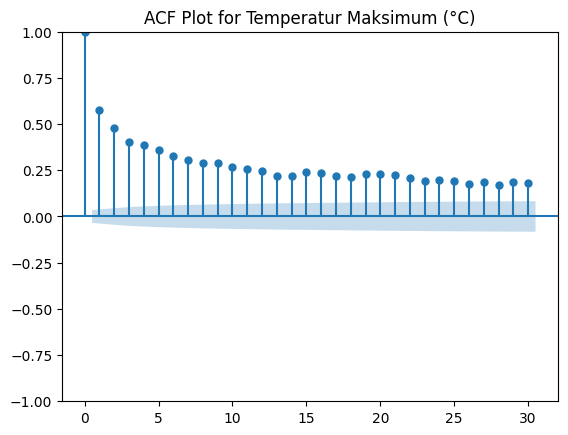

<Figure size 1200x600 with 0 Axes>

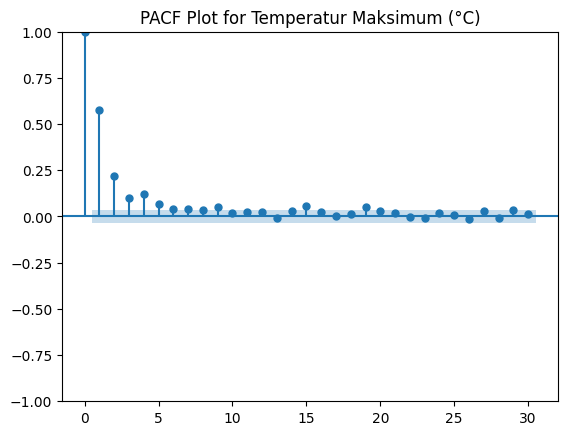

In [8]:
# Menampilkan plot ACF
plt.figure(figsize=(12, 6))
plot_acf(kolom_data, lags=30, title=f'ACF Plot for {nama_kolom}')
plt.show()

# Menampilkan plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(kolom_data, lags=30, title=f'PACF Plot for {nama_kolom}')
plt.show()

In [9]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

#Mencari kombinasi (p,q) menggunakan AIC
aic_values = []
for p in range(1, 3):
    for q in range(1, 6):
        model_arma = sm.tsa.ARIMA(df, order=(p,0,q))
        results = model_arma.fit()
        aic = results.aic
        aic_values.append((p, q, aic))

for p, q, aic in aic_values:
    print(f"ARMA({p},{q}) - AIC: {aic}")

ARMA(1,1) - AIC: 10381.279309266685
ARMA(1,2) - AIC: 10358.0802226763
ARMA(1,3) - AIC: 10341.603648852744
ARMA(1,4) - AIC: 10343.320322951367
ARMA(1,5) - AIC: 10341.327181205797
ARMA(2,1) - AIC: 10347.960971162312
ARMA(2,2) - AIC: 10334.43887092775
ARMA(2,3) - AIC: 10335.56454722502
ARMA(2,4) - AIC: 10345.591112328711
ARMA(2,5) - AIC: 10333.64208873046


In [10]:
print(f"Model ARMA Terbaik:", aic)

Model ARMA Terbaik: 10333.64208873046


Hasil analisis model ARMA(2,2):
                                  SARIMAX Results                                   
Dep. Variable:     Temperatur Maksimum (°C)   No. Observations:                 3161
Model:                       ARIMA(2, 0, 2)   Log Likelihood               -5161.964
Date:                      Sun, 09 Mar 2025   AIC                          10335.927
Time:                              20:46:19   BIC                          10372.279
Sample:                                   0   HQIC                         10348.968
                                     - 3161                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.9161      0.172    168.196      0.000      28.579      29.253
ar.L1          1.6242      0.054     30.184      0.

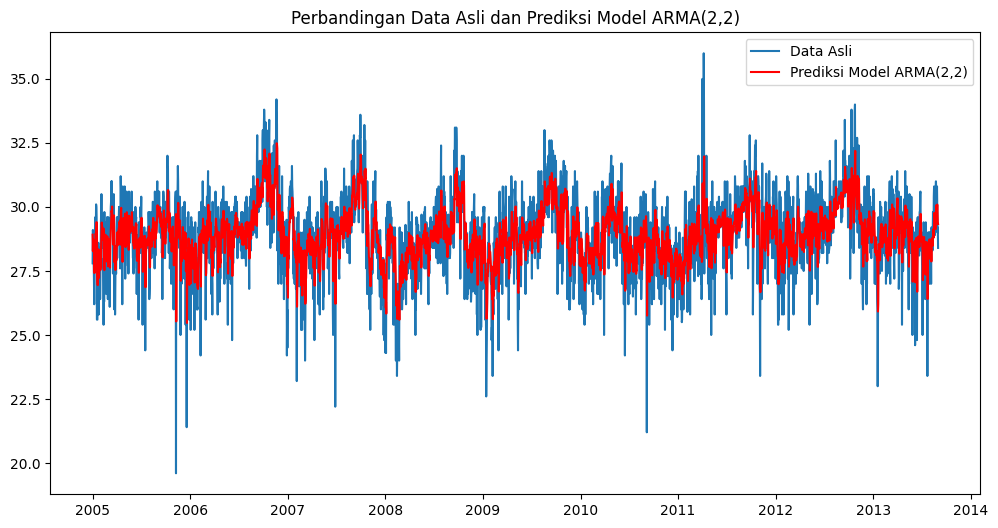

In [11]:
# F. Menerapkan Model ARMA(2,2)
model_arma = sm.tsa.ARIMA(kolom_data, order=(2, 0, 2))
results = model_arma.fit()

# Print hasil analisis model ARMA(2,2)
print("Hasil analisis model ARMA(2,2):")
print(results.summary())

# Plot hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(kolom_data, label="Data Asli")
plt.plot(results.fittedvalues, color='red', label="Prediksi Model ARMA(2,2)")
plt.legend()
plt.title("Perbandingan Data Asli dan Prediksi Model ARMA(2,2)")
plt.show()

In [12]:
model = sm.tsa.arima.ARIMA(df, order=(2, 0, 2))
model_fit = model.fit()

#Target forecasting dalam hari
forecast_steps = 365
forecast = model_fit.forecast(steps=forecast_steps)

print(f"Analisis Forecasting {len(forecast)} Hari")
forecast_data = pd.DataFrame(forecast)

#Mencari hasil dari metode ARMA(2,2)
import numpy as np

# Set a random seed for reproducibility
np.random.seed(42)
model = sm.tsa.SARIMAX(df, order=(2, 0, 2))
model_fit = model.fit()
n_simulated_steps = forecast_steps
pred = model_fit.get_prediction(start=len(df), end=len(df) + n_simulated_steps - 1, dynamic=True)
predicted_values = pred.predicted_mean
std_errors = pred.se_mean
residuals = model_fit.resid
simulated_data = np.zeros(n_simulated_steps)

for i in range(n_simulated_steps):
    simulated_data[i] = predicted_values[i] + np.random.normal(0, std_errors[i]) + residuals[-1]

print("Simulasi data ARMA:")
arma_sim = simulated_data.copy()
print(abs(arma_sim))

Analisis Forecasting 365 Hari
Simulasi data ARMA:
[28.66986624 27.9534978  29.09729563 30.40346124 27.92816396 27.94384091
 30.62030836 29.44313442 27.61515183 29.12899449 27.62464172 27.62008202
 28.68989337 25.41657124 25.69350116 27.46404656 26.7687846  28.80937622
 26.91981801 26.13186912 30.60760289 27.97116914 28.42974609 26.08153285
 27.46379514 28.49872436 26.49354037 28.9214604  27.36142    27.85380554
 27.35297541 31.31248493 28.2991442  26.60192989 29.66122236 26.32395643
 28.66240616 25.09570824 26.12765192 28.64479387 29.54454662 28.60371647
 28.12499004 27.81353517 25.83409209 27.10461948 27.53873313 30.10771107
 28.90021199 25.31196406 28.86956328 27.65563818 27.15202837 29.36889461
 30.09604586 29.92787276 26.85604148 27.77508861 28.89209994 30.02179222
 27.47138921 27.98568373 26.35911794 26.19460963 29.75373302 30.72465103
 28.18267793 30.10571583 28.95902022 27.15053793 28.96130812 31.08862417
 28.24450583 31.15029417 23.5398854  29.80840395 28.46747973 27.75961232
 

In [13]:
forecast_data['simulated_arima'] = abs(arma_sim.copy())


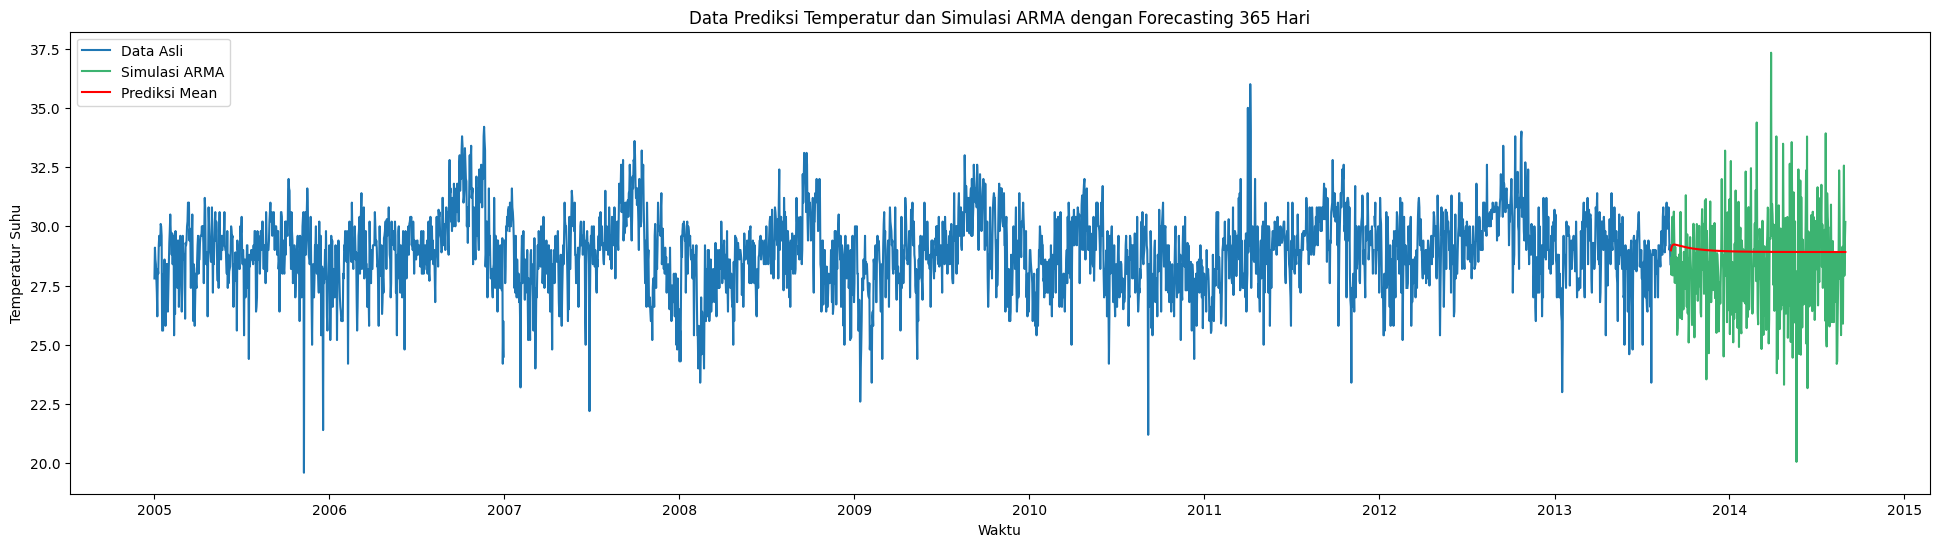

In [14]:
plt.figure(figsize=(24,6))
plt.plot(df.index, df, label='Data Asli')

# Plot the simulated ARMA
plt.plot(forecast_data.index,forecast_data.simulated_arima, label='Simulasi ARMA', color='mediumseagreen')


# Plot the predicted mean from ARIMA
plt.plot(forecast_data.index,forecast_data.predicted_mean, label='Prediksi Mean', color='red')

title = f'Data Prediksi Temperatur dan Simulasi ARMA dengan Forecasting {forecast_steps} Hari'
plt.title(title)
plt.xlabel('Waktu')
plt.ylabel('Temperatur Suhu')
plt.legend()
plt.show()